(28, 28)
784
10000/10000 [==============================] - 1s 66us/step
Evaluation result on Test Data : Loss = 0.08994026334997914, accuracy = 0.9821000099182129


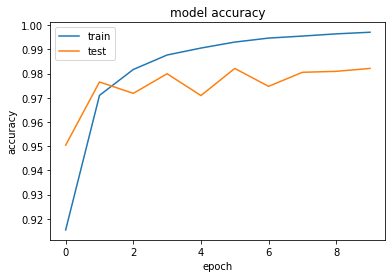

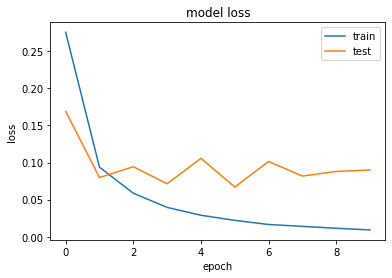

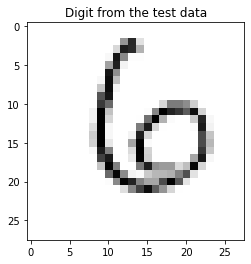

Predicted digit: 6
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


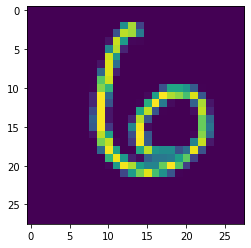

In [2]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()
print(train_images.shape[1:])

# Processing the data
# Converting each image of shape 28*28 to 784 dimension which is fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)
# Converting data to float and scale values of 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
# Scaling data
train_data /=255.0
test_data /=255.0
# Changing the labels from integer to one-hot encoding
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
# Creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=0,
                   validation_data=(test_data, test_labels_one_hot))

# Evaluating the model to find the loss and accuracy
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

# Summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

image_index = 100
# Displaying the image at index 100 in the training data
plt.imshow(test_data[image_index].reshape(28, 28),cmap='Greys')
plt.title("Digit from the test data")
plt.show()
# Applying inference on the model
pred = model.predict(test_data[image_index].reshape(1,784))
plt.imshow(test_data[image_index].reshape(28,28))
print("Predicted digit:",pred.argmax())
print(history.history.keys())
